# Generate Example Visuals
See Software Documentation (https://anl-ceeesa.github.io/RELOG/0.5/usage/) for Additional Examples

Python Dependencies: Pandas, Seaborn

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
sns.set_style("white")

In [28]:
simulation = "20230306_CASE0_Manufacturing_v1"

### Plant Costs

#### Total Costs

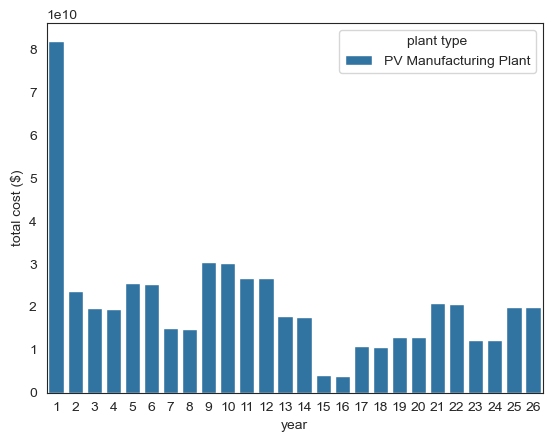

In [29]:
data = pd.read_csv(f"output/{simulation}/plants.csv")
sns.barplot(
    x="year",
    y="total cost ($)",
    hue="plant type",
    data=data.groupby(["plant type", "year"]).sum().reset_index(),
)
plt.savefig(f"figures/{simulation}/plant_costs.pdf", dpi=300);

In [30]:
data.columns

Index(['plant type', 'location name', 'year', 'latitude (deg)',
       'longitude (deg)', 'capacity (tonne)', 'amount processed (tonne)',
       'amount received (tonne)', 'amount in storage (tonne)',
       'utilization factor (%)', 'energy (GJ)', 'opening cost ($)',
       'expansion cost ($)', 'fixed operating cost ($)',
       'variable operating cost ($)', 'storage cost ($)', 'total cost ($)'],
      dtype='object')

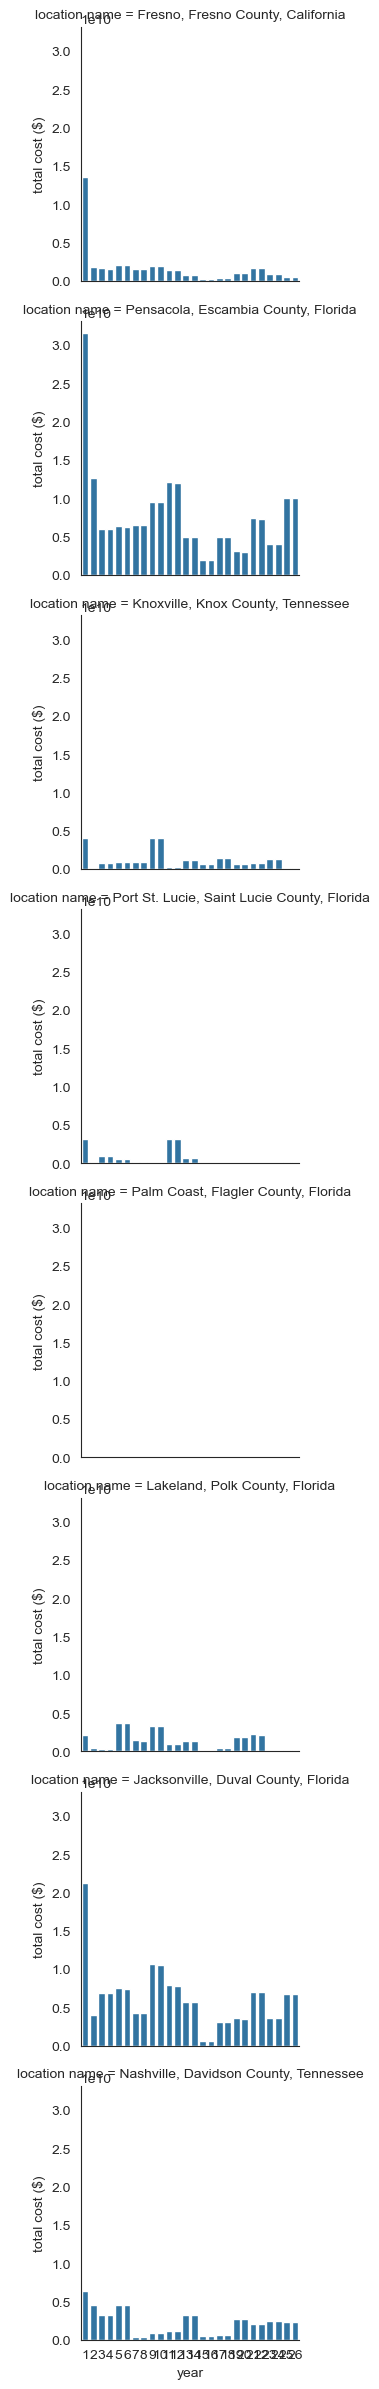

In [31]:
locations = sns.FacetGrid(data, row="location name")
locations.map(sns.barplot, "year", "total cost ($)", errorbar = None, order = None)

In [32]:
data

,plant type,location name,year,latitude (deg),longitude (deg),capacity (tonne),amount processed (tonne),amount received (tonne),amount in storage (tonne),utilization factor (%),energy (GJ),opening cost ($),expansion cost ($),fixed operating cost ($),variable operating cost ($),storage cost ($),total cost ($)
0,PV Manufacturing Plant,"Fresno, Fresno County, California",1,36.7831,-119.7941,2726013.87,2726013.87,2726013.87,0.0,100.00,5.418515e+08,0.0,14127206.99,1323023.52,1.350334e+10,0.0,1.351879e+10
1,PV Manufacturing Plant,"Fresno, Fresno County, California",2,36.7831,-119.7941,2726013.87,365636.59,365636.59,0.0,13.41,7.267782e+07,0.0,0.00,1323023.52,1.811185e+09,0.0,1.812508e+09
2,PV Manufacturing Plant,"Fresno, Fresno County, California",3,36.7831,-119.7941,2726013.87,321437.71,321437.71,0.0,11.79,6.389238e+07,0.0,0.00,1323023.52,1.592245e+09,0.0,1.593568e+09
3,PV Manufacturing Plant,"Fresno, Fresno County, California",4,36.7831,-119.7941,2726013.87,318344.35,318344.35,0.0,11.68,6.327751e+07,0.0,0.00,1323023.52,1.576922e+09,0.0,1.578245e+09
4,PV Manufacturing Plant,"Fresno, Fresno County, California",5,36.7831,-119.7941,2726013.87,405128.15,405128.15,0.0,14.86,8.052758e+07,0.0,0.00,1323023.52,2.006807e+09,0.0,2.008130e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,PV Manufacturing Plant,"Nashville, Davidson County, Tennessee",22,36.1715,-86.7843,1327622.02,416481.07,416481.07,0.0,31.37,8.278421e+07,0.0,0.00,622119.74,1.991904e+09,0.0,1.992526e+09
204,PV Manufacturing Plant,"Nashville, Davidson County, Tennessee",23,36.1715,-86.7843,1327622.02,513986.24,513986.24,0.0,38.71,1.021654e+08,0.0,0.00,622119.74,2.458242e+09,0.0,2.458864e+09
205,PV Manufacturing Plant,"Nashville, Davidson County, Tennessee",24,36.1715,-86.7843,1327622.02,512815.21,512815.21,0.0,38.63,1.019326e+08,0.0,0.00,622119.74,2.452641e+09,0.0,2.453263e+09
206,PV Manufacturing Plant,"Nashville, Davidson County, Tennessee",25,36.1715,-86.7843,1327622.02,493837.49,493837.49,0.0,37.20,9.816040e+07,0.0,0.00,622119.74,2.361877e+09,0.0,2.362499e+09


In [33]:
columns = [
    "opening cost ($)",
    "expansion cost ($)",
    "fixed operating cost ($)",
    "variable operating cost ($)",
    "storage cost ($)",
]

In [34]:
data.columns

Index(['plant type', 'location name', 'year', 'latitude (deg)',
       'longitude (deg)', 'capacity (tonne)', 'amount processed (tonne)',
       'amount received (tonne)', 'amount in storage (tonne)',
       'utilization factor (%)', 'energy (GJ)', 'opening cost ($)',
       'expansion cost ($)', 'fixed operating cost ($)',
       'variable operating cost ($)', 'storage cost ($)', 'total cost ($)'],
      dtype='object')

#### Cost Breakdown

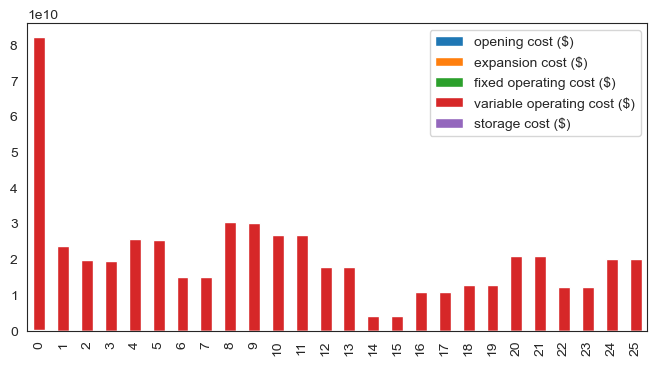

In [35]:
columns = [
    "opening cost ($)",
    "expansion cost ($)",
    "fixed operating cost ($)",
    "variable operating cost ($)",
    "storage cost ($)",
]
data = pd.read_csv(f"output/{simulation}/plants.csv")
df = data.groupby(["plant type", "year"]).sum().reset_index()
df[columns].plot(kind="bar", stacked=True, figsize=(8, 4))
plt.savefig(f"figures/{simulation}/plant_costs_breakdown.pdf", dpi=300);

### Transportation Data

**Troubleshoot if there is an error importing geopandas**

1) Install the following packages in your environment:
* ```conda install gdal```
* ```conda install fiona```
* ```conda install geopandas```

2) Import `fiona` *before* `geopandas`.
3) If you get a library not found, use [this workaround](https://stackoverflow.com/questions/71088072/installing-geopandas-on-apple-m1-chip) to solve it. In short, look for a library with similar same as the one that is not found, make a copy and name it as the one that it wants to find. In my case, it was looking for `libLerc.4.dylib` located in `/Users/mmendez/miniconda3/envs/RELOG/lib`. So I found the file `libLerc.dylib` and renamed it as `libLerc.4.dylib` and it worked! Wohoo!

*Note: This is most likely an error for M1 apple users.*

In [36]:
import fiona
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import collections
from shapely.geometry import LineString, Point

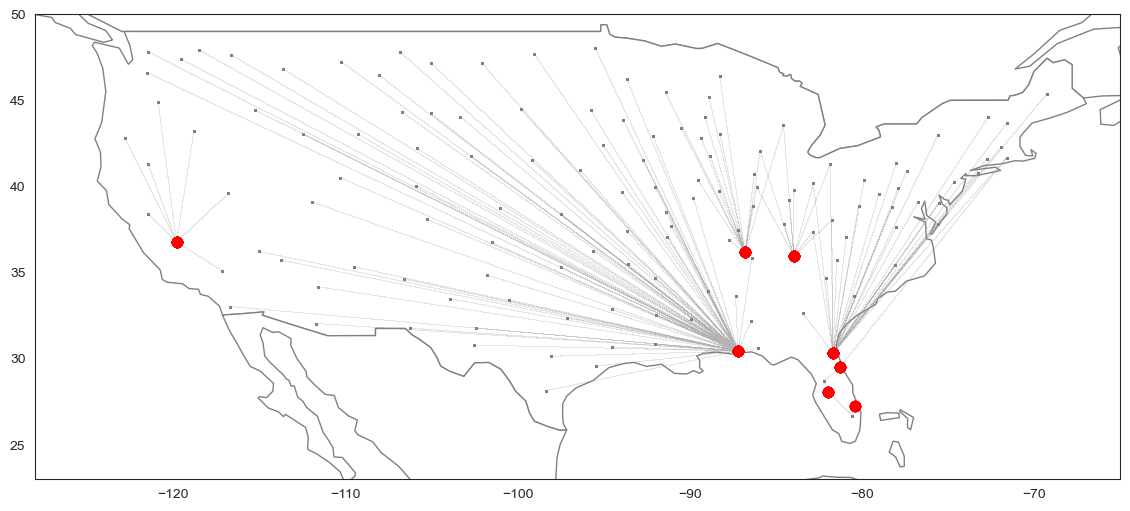

In [37]:
# Plot base map
world = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
ax = world.plot(color="white", edgecolor="0.5", figsize=(14, 7))
ax.set_ylim([23, 50])
ax.set_xlim([-128, -65])

# Draw transportation lines
data = pd.read_csv(f"output/{simulation}/transportation.csv")
lines = [
    [
        (
            row["source longitude (deg)"],
            row["source latitude (deg)"],
        ),
        (
            row["destination longitude (deg)"],
            row["destination latitude (deg)"],
        ),
    ]
    for (index, row) in data.iterrows()
]
ax.add_collection(
    collections.LineCollection(
        lines,
        linewidths=0.01,
        zorder=1,
        alpha=0.5,
        color="0.7",
    )
)

# Draw source points
points = gp.points_from_xy(
    data["source longitude (deg)"],
    data["source latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="0.5", markersize=1)

# Draw destination points
points = gp.points_from_xy(
    data["destination longitude (deg)"],
    data["destination latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="red", markersize=50)
plt.savefig(f"figures/{simulation}/recycling_logistics.pdf", dpi=300);
plt.savefig(f"figures/{simulation}/recycling_logistics.png", dpi=300);

In [38]:
gp.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

<AxesSubplot:>

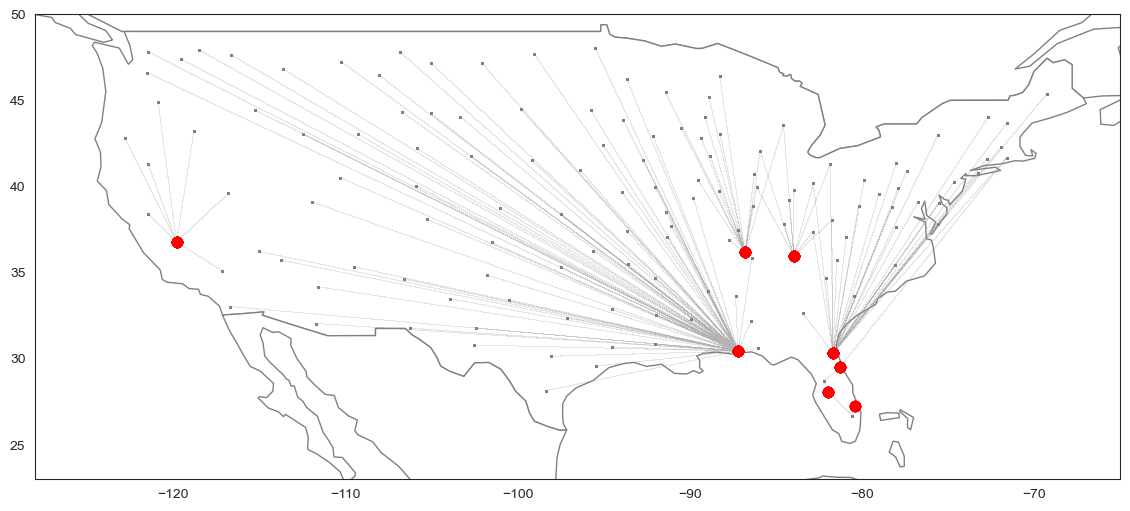

In [39]:
# Plot base map
world = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
ax = world.plot(color="white", edgecolor="0.5", figsize=(14, 7))
ax.set_ylim([23, 50])
ax.set_xlim([-128, -65])

# Draw transportation lines
data = pd.read_csv(f"output/{simulation}/transportation.csv")
lines = [
    [
        (
            row["source longitude (deg)"],
            row["source latitude (deg)"],
        ),
        (
            row["destination longitude (deg)"],
            row["destination latitude (deg)"],
        ),
    ]
    for (index, row) in data.iterrows()
]
ax.add_collection(
    collections.LineCollection(
        lines,
        linewidths=0.01,
        zorder=1,
        alpha=0.5,
        color="0.7",
    )
)

# Draw source points
points = gp.points_from_xy(
    data["source longitude (deg)"],
    data["source latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="0.5", markersize=1)

# Draw destination points
points = gp.points_from_xy(
    data["destination longitude (deg)"],
    data["destination latitude (deg)"],
)
gp.GeoDataFrame(data, geometry=points).plot(ax=ax, color="red", markersize=50)
# plt.savefig(f"figures/{simulation}/recycling_logistics.pdf", dpi=300);
# plt.savefig(f"figures/{simulation}/recycling_logistics.png", dpi=300);